In [225]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [226]:
xl = pd.ExcelFile("OI Case study - data.xlsx")

In [227]:
xl.sheet_names

['Notes', 'Dataset A', 'Dataset B']

Zones without registry (NaN) are removed

In [228]:
dataA = xl.parse("Dataset A")
dataA = dataA[dataA['Start zone'].notna()]

In [229]:
dataB = xl.parse("Dataset B")

dataB = dataB[dataB['Zone name'].notna()]

In [230]:
dataA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6188 entries, 0 to 6189
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Session ID           6188 non-null   float64       
 1   Date                 6188 non-null   datetime64[ns]
 2   Hour of day          6188 non-null   float64       
 3   Distance to vehicle  6188 non-null   float64       
 4   Converted to Trip    6188 non-null   float64       
 5   Start zone           6188 non-null   object        
 6   End zone             3453 non-null   object        
 7   Battery starting %   3453 non-null   float64       
 8   Battery ending %     3453 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 483.4+ KB


In [231]:
dataA.head()

,Session ID,Date,Hour of day,Distance to vehicle,Converted to Trip,Start zone,End zone,Battery starting %,Battery ending %
0,335401.0,2020-07-25,17.0,356.0,0.0,Zone Z,NaN,NaN,NaN
1,540099.0,2020-07-24,13.0,334.0,0.0,Zone W,NaN,NaN,NaN
2,555303.0,2020-07-26,23.0,225.0,0.0,Zone H,NaN,NaN,NaN
3,685698.0,2020-07-22,11.0,152.0,1.0,Zone N,Zone AC,33.0,27.0
4,704251.0,2020-07-16,19.0,23.0,1.0,Zone G,Zone Y,31.0,14.0


In [232]:
dataA['Date'] = dataA['Date'].dt.strftime('%Y-%m-%d')
dataA['Converted to Trip'] = dataA['Converted to Trip'].astype(int)

In [233]:
dataB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 0 to 503
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                504 non-null    datetime64[ns]
 1   Zone name           504 non-null    object        
 2   Demand (sessions)   504 non-null    float64       
 3   Unconverted demand  504 non-null    float64       
 4   Trip starts         504 non-null    float64       
 5   Trip ends           504 non-null    float64       
 6   Active vehicles     504 non-null    float64       
 7   Zeroed vehicles     504 non-null    float64       
 8   Inactive vehicles   504 non-null    float64       
 9   Decayed vehicles    504 non-null    float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 43.3+ KB


In [234]:
dataB.head()

,Date,Zone name,Demand (sessions),Unconverted demand,Trip starts,Trip ends,Active vehicles,Zeroed vehicles,Inactive vehicles,Decayed vehicles
0,2020-07-13,Warehouse,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0
1,2020-07-13,Zone A,21.0,8.0,13.0,8.0,15.0,1.0,1.0,0.0
2,2020-07-13,Zone AA,3.0,2.0,1.0,3.0,5.0,2.0,1.0,0.0
3,2020-07-13,Zone AB,4.0,3.0,1.0,1.0,3.0,1.0,0.0,0.0
4,2020-07-13,Zone AC,4.0,2.0,2.0,1.0,4.0,0.0,0.0,0.0


In [235]:
# giving format to the datetime variable
dataB['Date'] = dataB['Date'].dt.strftime('%Y-%m-%d')

Based on our trip data, which are our top performing zones and which
are our worst performing zones?

In [236]:
# Let's explore how many zones we have in dataA
dataA_zones = dataA['Start zone'].nunique()
print(f'The number of zones where trips begin in dataA are {dataA_zones}')
print('')
print(dataA['Start zone'].unique())

The number of zones where trips begin in dataA are 35

['Zone Z' 'Zone W' 'Zone H' 'Zone N' 'Zone G' 'Zone B' 'Zone L' 'Zone AH'
 'Zone A' 'Zone AA' 'Zone R' 'Zone S' 'Zone X' 'Zone M' 'Zone E' 'Zone Q'
 'Zone F' 'Zone AE' 'Zone I' 'Zone Y' 'Zone T' 'Zone D' 'Zone P' 'Zone O'
 'Zone AG' 'Zone AI' 'Zone K' 'Zone AD' 'Zone AF' 'Zone C' 'Zone V'
 'Zone AB' 'Zone AC' 'Zone U' 'Zone J']


In [237]:
# Let's explore how many zones we have in dataB
dataB_zones = dataB['Zone name'].nunique()
print(f'The number of zones where trips begin in dataB are {dataB_zones}')
print('')
print(dataB['Zone name'].unique())

The number of zones where trips begin in dataB are 36

['Warehouse' 'Zone A' 'Zone AA' 'Zone AB' 'Zone AC' 'Zone AD' 'Zone AE'
 'Zone AF' 'Zone AG' 'Zone AH' 'Zone AI' 'Zone B' 'Zone C' 'Zone D'
 'Zone E' 'Zone F' 'Zone G' 'Zone H' 'Zone I' 'Zone J' 'Zone K' 'Zone L'
 'Zone M' 'Zone N' 'Zone O' 'Zone P' 'Zone Q' 'Zone R' 'Zone S' 'Zone T'
 'Zone U' 'Zone V' 'Zone W' 'Zone X' 'Zone Y' 'Zone Z']


# Exploring the data

In [238]:
df = dataA
fig = px.bar(df, x="Hour of day", y="Converted to Trip", color="Start zone")
fig.show()

In [239]:
df = dataA.groupby(['Hour of day','Start zone'],sort=True)['Converted to Trip'].agg(lambda x: x.eq(1).sum()).reset_index()
df[300:320]

,Hour of day,Start zone,Converted to Trip
300,12.0,Zone AF,1
301,12.0,Zone AH,1
302,12.0,Zone AI,0
303,12.0,Zone B,24
304,12.0,Zone C,3
305,12.0,Zone D,35
306,12.0,Zone E,10
307,12.0,Zone F,11
308,12.0,Zone G,66
309,12.0,Zone H,10


In [240]:
fig = px.bar(df, x="Hour of day", y="Converted to Trip", color="Start zone",
            title="Performance (Converted to Trip per hour) by zone",
             labels={"Converted to Trip": "Converted to Trip"})
fig.show()

In [241]:
dfn = dataA.groupby(['Hour of day','Start zone'],sort=True)['Converted to Trip'].agg(lambda x: x.eq(0).sum()).reset_index()
dfn[300:320]

,Hour of day,Start zone,Converted to Trip
300,12.0,Zone AF,1
301,12.0,Zone AH,1
302,12.0,Zone AI,1
303,12.0,Zone B,13
304,12.0,Zone C,2
305,12.0,Zone D,5
306,12.0,Zone E,5
307,12.0,Zone F,6
308,12.0,Zone G,27
309,12.0,Zone H,13


In [242]:
fig = px.bar(dfn, x="Hour of day", y="Converted to Trip", color="Start zone"
            ,title="Performance (Not Converted to Trip per hour) by zone",
            labels={"Converted to Trip": "Not Converted to Trip"})
fig.show()

In [243]:
dfn = dfn.sort_values(by = ['Start zone'], ascending=[True])
fig = px.bar(dfn, x="Start zone", y="Converted to Trip", color="Start zone"
            ,title="Not Converted to Trip by zone",
            labels={"Converted to Trip": "Not Converted to Trip"})
fig.show()

In [244]:
dfn["Not Converted to Trip"] = df['Converted to Trip']

In [245]:

dfn['Rate Converted to Trip'] = (dfn['Not Converted to Trip'] - dfn['Converted to Trip'])/dfn['Converted to Trip']
fig = px.bar(dfn, x="Start zone", y='Rate Converted to Trip', color="Start zone"
            ,title="Not Converted to Trip by zone",
            labels={"Converted to Trip": "Not Converted to Trip"})
fig.show()

In [246]:
df_end = dataA.groupby(['Hour of day','End zone'],sort=True)['Converted to Trip'].agg(lambda x: x.eq(1).sum()).reset_index()
df_end[300:320]

,Hour of day,End zone,Converted to Trip
300,13.0,Zone F,11
301,13.0,Zone G,47
302,13.0,Zone H,6
303,13.0,Zone I,1
304,13.0,Zone J,3
305,13.0,Zone K,18
306,13.0,Zone L,1
307,13.0,Zone M,2
308,13.0,Zone N,2
309,13.0,Zone O,1


In [247]:
df_end = df_end.sort_values(by = ['End zone'], ascending=[True])
fig = px.bar(df_end, x="End zone", y="Converted to Trip", color="End zone"
            ,title="Converted to Trip by End zone",
            labels={"Converted to Trip": "Converted to Trip"})
fig.show()

In [248]:
dfna = dfn.groupby(['Hour of day'],sort=True)['Converted to Trip', 'Not Converted to Trip'].agg('sum').reset_index()

dfna.sort_values(by = ['Hour of day'], ascending=[False]).reset_index(drop=True)

dfna

<ipython-input-248-c39b5a4f1e7d>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Hour of day,Converted to Trip,Not Converted to Trip
0,0.0,56,56
1,1.0,33,50
2,2.0,29,17
3,3.0,17,29
4,4.0,16,29
5,5.0,13,17
6,6.0,13,86
7,7.0,55,172
8,8.0,40,191
9,9.0,80,208


<AxesSubplot:xlabel='Hour of day'>

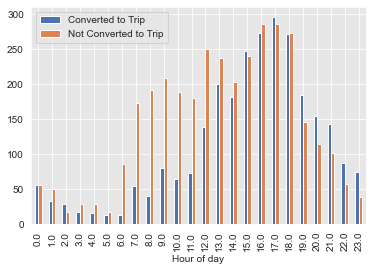

In [249]:
dfna.plot(x="Hour of day", y=["Converted to Trip", "Not Converted to Trip"], kind="bar")

In [250]:
dfnb = dfn.groupby(['Start zone'],sort=True)['Converted to Trip', 'Not Converted to Trip'].agg('sum').reset_index()

dfnb.sort_values(by = ['Start zone'], ascending=[False]).reset_index(drop=True)

dfnb

<ipython-input-250-6191c05b61dc>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Start zone,Converted to Trip,Not Converted to Trip
0,Zone A,126,235
1,Zone AA,46,63
2,Zone AB,52,18
3,Zone AC,35,21
4,Zone AD,29,19
5,Zone AE,40,25
6,Zone AF,39,22
7,Zone AG,32,16
8,Zone AH,55,25
9,Zone AI,19,13


<AxesSubplot:xlabel='Start zone'>

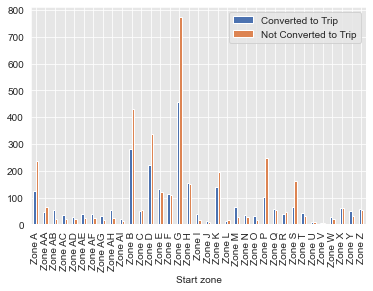

In [251]:
dfnb.plot(x="Start zone", y=["Converted to Trip", "Not Converted to Trip"], kind="bar")

# Top and Worse Performing Zones

To find the top and worse performing zones we will group by zone and sum the number of 'Converted to Trip'

In [252]:
performance_df = dataA.groupby(['Start zone'],sort=True)['Converted to Trip', 'Hour of day','Distance to vehicle'].agg('sum').reset_index()

performance_df.sort_values(by = ['Converted to Trip'], ascending=[False]).reset_index(drop=True)

<ipython-input-252-ad6ee23e4360>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Start zone,Converted to Trip,Hour of day,Distance to vehicle
0,Zone G,773,17876.0,62997.0
1,Zone B,429,10319.0,57388.0
2,Zone D,337,8199.0,37867.0
3,Zone P,247,4585.0,27401.0
4,Zone A,235,4677.0,27718.0
5,Zone K,197,4990.0,20625.0
6,Zone S,160,2866.0,17344.0
7,Zone H,150,4314.0,90942.0
8,Zone E,122,3599.0,70048.0
9,Zone F,108,3301.0,60568.0


In [253]:
df = performance_df
fig = px.bar(df, x='Start zone', y='Converted to Trip',color="Start zone")
fig.show()

In [254]:
df = performance_df
fig = px.bar(df, x="Start zone", y="Distance to vehicle", color="Start zone")
fig.show()

In [255]:
df = performance_df

fig = px.scatter(df, x="Start zone", y="Converted to Trip",
	         size="Distance to vehicle", color="Start zone", size_max=60,
                title="Performance (Converted to Trip and Distance to vehicle) by zone")
fig.show()

# Where & when is our missed demand highest?

In [256]:
dataA['Converted to Trip'].head()

0    0
1    0
2    0
3    1
4    1
Name: Converted to Trip, dtype: int32

In [257]:
dataA['Converted to Trip'].loc[dataA['Converted to Trip']==0].head(10)

0     0
1     0
2     0
8     0
10    0
12    0
15    0
16    0
17    0
20    0
Name: Converted to Trip, dtype: int32

In [258]:
df = dataB
fig = px.bar(df, x='Zone name', y='Unconverted demand', color="Date")
fig.show()

In [259]:
performance_df = dataB.groupby(['Date'],sort=True)['Unconverted demand'].agg('sum').reset_index()
performance_df.sort_values(by = ['Unconverted demand'], ascending=[False]).reset_index(drop=True)

,Date,Unconverted demand
0,2020-07-26,477.0
1,2020-07-25,437.0
2,2020-07-18,289.0
3,2020-07-19,209.0
4,2020-07-24,203.0
5,2020-07-16,180.0
6,2020-07-14,145.0
7,2020-07-20,140.0
8,2020-07-22,124.0
9,2020-07-13,113.0


In [260]:
df = dataB.sort_values(by = ['Unconverted demand'], ascending=[False])
fig = px.bar(df, x='Unconverted demand', y='Date', color="Zone name")
fig.show()

# What is our vehicle availability by zone? How does battery health impact this metric?

Battery levels without a number (NaN) are unavailable vehicles.
These rows are removed to determine the number of available vehicles per zone.

In [261]:
dataB.describe()

,Demand (sessions),Unconverted demand,Trip starts,Trip ends,Active vehicles,Zeroed vehicles,Inactive vehicles,Decayed vehicles
count,504.000000,504.000000,504.00000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,12.277778,5.426587,6.85119,6.851190,7.246032,1.017857,1.716270,0.029762
std,21.142380,8.364614,13.30360,12.012075,9.368265,1.513911,3.929404,0.192057
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.00000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,5.000000,3.000000,2.00000,3.000000,5.000000,1.000000,0.000000,0.000000
75%,13.000000,6.000000,7.00000,7.000000,8.000000,2.000000,2.000000,0.000000
max,226.000000,81.000000,145.00000,133.000000,94.000000,11.000000,31.000000,2.000000


In [262]:
dataB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 0 to 503
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                504 non-null    object 
 1   Zone name           504 non-null    object 
 2   Demand (sessions)   504 non-null    float64
 3   Unconverted demand  504 non-null    float64
 4   Trip starts         504 non-null    float64
 5   Trip ends           504 non-null    float64
 6   Active vehicles     504 non-null    float64
 7   Zeroed vehicles     504 non-null    float64
 8   Inactive vehicles   504 non-null    float64
 9   Decayed vehicles    504 non-null    float64
dtypes: float64(8), object(2)
memory usage: 43.3+ KB


In [263]:
availability_by_zone = dataB.groupby(['Zone name'],sort=True)['Active vehicles'].agg('sum').reset_index()
availability_by_zone.sort_values(by = ['Active vehicles'], ascending=[False])

,Zone name,Active vehicles
16,Zone G,502.0
11,Zone B,309.0
13,Zone D,275.0
25,Zone P,190.0
20,Zone K,172.0
31,Zone V,169.0
1,Zone A,169.0
17,Zone H,129.0
14,Zone E,122.0
15,Zone F,106.0


In [264]:
df = availability_by_zone
fig = px.bar(df, x='Zone name', y='Active vehicles', color="Zone name")
fig.show()

# Demand

In [265]:
demand_by_zone = dataB.groupby(['Zone name'],sort=True)['Demand (sessions)', 'Unconverted demand'].agg('sum').reset_index()
demand_by_zone.sort_values(by = ['Zone name'], ascending=[True])

<ipython-input-265-98af17608d02>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Zone name,Demand (sessions),Unconverted demand
0,Warehouse,0.0,0.0
1,Zone A,361.0,126.0
2,Zone AA,109.0,46.0
3,Zone AB,70.0,52.0
4,Zone AC,56.0,35.0
5,Zone AD,48.0,29.0
6,Zone AE,65.0,40.0
7,Zone AF,61.0,39.0
8,Zone AG,48.0,32.0
9,Zone AH,80.0,55.0


<AxesSubplot:xlabel='Zone name'>

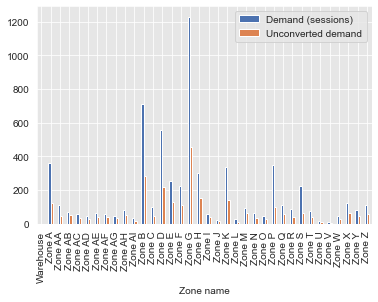

In [266]:
demand_by_zone.plot(x="Zone name", y=['Demand (sessions)', 'Unconverted demand'], kind="bar")

In [267]:
demand_by_zone['Demand_Oportunity'] = demand_by_zone['Demand (sessions)']-demand_by_zone['Unconverted demand']
demand_by_zone.sort_values(by = ['Demand_Oportunity'], ascending=[False])

,Zone name,Demand (sessions),Unconverted demand,Demand_Oportunity
16,Zone G,1229.0,456.0,773.0
11,Zone B,711.0,282.0,429.0
13,Zone D,557.0,220.0,337.0
25,Zone P,349.0,102.0,247.0
1,Zone A,361.0,126.0,235.0
20,Zone K,338.0,141.0,197.0
28,Zone S,224.0,64.0,160.0
17,Zone H,303.0,153.0,150.0
14,Zone E,254.0,132.0,122.0
15,Zone F,222.0,114.0,108.0


# Converted trips

In [268]:
df = dataA
total_convertion = df.groupby(['Converted to Trip','Start zone']).size().reset_index().groupby('Converted to Trip')[[0]].max()
total_convertion['%'] = total_convertion

## total

In [269]:
df = total_convertion.reset_index()

df['Converted to Trip'][df['Converted to Trip'] == 1] = 'yes' 
df['Converted to Trip'][df['Converted to Trip'] == 0]   = 'no'

fig = px.pie(df, values='%',  title='Converted to Trip',names=['no','yes'])
fig.show()

## by zone

In [270]:
df = dataA
df['Total Converted to Trip'] = 1 # initialize the variable
df['Converted to Trip'][df['Converted to Trip'] == 1] = 'yes' 
df['Converted to Trip'][df['Converted to Trip'] == 0]   = 'no'
df = df.groupby(['Start zone','Converted to Trip']).agg({'Total Converted to Trip': 'sum'})
df

<ipython-input-270-019edc70eff9>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Total Converted to Trip
Start zone Converted to Trip                         
Zone A     no                                     126
           yes                                    235
Zone AA    no                                      46
           yes                                     63
Zone AB    no                                      52
...                                               ...
Zone X     yes                                     62
Zone Y     no                                      49
           yes                                     31
Zone Z     no                                      58
           yes                                     53

[70 rows x 1 columns]

In [271]:
df = dataA
df['Converted to Trip'][df['Converted to Trip'] == 1] = 'yes' 
df['Converted to Trip'][df['Converted to Trip'] == 0]   = 'no'
df = df.groupby(['Start zone','Converted to Trip']).agg({'Total Converted to Trip': 'sum'}).reset_index()
fig = px.scatter(df, x="Start zone", y="Total Converted to Trip", color="Converted to Trip",color_continuous_scale='Bluered')
fig.show()

In [272]:
#df = dataA
df['%'] = (100 * df['Total Converted to Trip'] / df.groupby(['Start zone'])['Total Converted to Trip'].transform('sum')).astype(int)
df.head(10)

,Start zone,Converted to Trip,Total Converted to Trip,%
0,Zone A,no,126,34
1,Zone A,yes,235,65
2,Zone AA,no,46,42
3,Zone AA,yes,63,57
4,Zone AB,no,52,74
5,Zone AB,yes,18,25
6,Zone AC,no,35,62
7,Zone AC,yes,21,37
8,Zone AD,no,29,60
9,Zone AD,yes,19,39


In [273]:
fig = px.scatter(df, x="Start zone", y="%", color="Converted to Trip",color_continuous_scale='Bluered')
fig.show()

In [274]:
fig = px.sunburst(df, path=['Converted to Trip', 'Start zone'], values='Total Converted to Trip',
                  color='%', hover_data=['Total Converted to Trip'],
                  color_continuous_scale='RdBu')
fig.show()

## what about the battery level?

In [275]:
fig = px.bar(dataA, 
                 x="Start zone", y=['Battery starting %','Battery ending %'],color_continuous_scale='Bluered',
                labels={"value": "Cumulative level"}, barmode='group')
fig.show()

# So, what else could we do?

Join the DataFrames by zone

In [276]:
A = dataA.dropna()

dataA_sum_by_zones = A.groupby('Start zone').mean().reset_index()

# Renaming the column Start zone with Zone to join with the table dataB
dataA_sum_by_zones.rename(columns={'Start zone':'Zone'}, inplace=True)
dataA_sum_by_zones.head()

,Zone,Session ID,Hour of day,Distance to vehicle,Battery starting %,Battery ending %,Total Converted to Trip
0,Zone A,5.016273e+08,12.106383,82.987234,52.157447,35.076596,1
1,Zone AA,5.449258e+08,11.904762,177.698413,56.015873,36.285714,1
2,Zone AB,5.383124e+08,10.944444,91.944444,54.500000,36.333333,1
3,Zone AC,4.446756e+08,11.476190,132.047619,60.380952,43.000000,1
4,Zone AD,5.556867e+08,11.210526,123.052632,53.631579,42.789474,1


In [277]:
fig = px.scatter(dataA_sum_by_zones, 
                 x="Zone", y=['Battery starting %','Battery ending %'],color_continuous_scale='Bluered',
                labels={
                     "value": "Battery level [%]"
                 },)
fig.show()

In [278]:
dataB_sum_by_zones = dataB.groupby(['Zone name'],sort=True)['Demand (sessions)','Unconverted demand','Trip starts','Trip ends','Active vehicles','Zeroed vehicles','Inactive vehicles','Decayed vehicles'].agg('sum').reset_index()
dataB_sum_by_zones.head()

<ipython-input-278-320ebc5a18e4>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Zone name,Demand (sessions),Unconverted demand,Trip starts,Trip ends,Active vehicles,Zeroed vehicles,Inactive vehicles,Decayed vehicles
0,Warehouse,0.0,0.0,0.0,0.0,0.0,0.0,264.0,0.0
1,Zone A,361.0,126.0,235.0,212.0,169.0,6.0,41.0,0.0
2,Zone AA,109.0,46.0,63.0,56.0,66.0,7.0,13.0,1.0
3,Zone AB,70.0,52.0,18.0,34.0,52.0,8.0,3.0,0.0
4,Zone AC,56.0,35.0,21.0,26.0,53.0,13.0,0.0,0.0


In [279]:
dataB_sum_by_zones = dataB.groupby(['Zone name'],sort=True)['Demand (sessions)','Unconverted demand','Trip starts','Trip ends','Active vehicles','Zeroed vehicles','Inactive vehicles','Decayed vehicles'].agg('sum').reset_index()
dataB_sum_by_zones.head()

<ipython-input-279-320ebc5a18e4>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Zone name,Demand (sessions),Unconverted demand,Trip starts,Trip ends,Active vehicles,Zeroed vehicles,Inactive vehicles,Decayed vehicles
0,Warehouse,0.0,0.0,0.0,0.0,0.0,0.0,264.0,0.0
1,Zone A,361.0,126.0,235.0,212.0,169.0,6.0,41.0,0.0
2,Zone AA,109.0,46.0,63.0,56.0,66.0,7.0,13.0,1.0
3,Zone AB,70.0,52.0,18.0,34.0,52.0,8.0,3.0,0.0
4,Zone AC,56.0,35.0,21.0,26.0,53.0,13.0,0.0,0.0


In [280]:
# removing the row with Warehouse in Zone name
i = dataB_sum_by_zones.loc[(dataB_sum_by_zones['Zone name'] == 'Warehouse')].index
dataB_sum_by_zones = dataB_sum_by_zones.drop(i)

# Renaming the column Start zone with Zone to join with the table dataB
dataB_sum_by_zones.rename(columns={'Zone name':'Zone'}, inplace=True) 
dataB_sum_by_zones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1 to 35
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Zone                35 non-null     object 
 1   Demand (sessions)   35 non-null     float64
 2   Unconverted demand  35 non-null     float64
 3   Trip starts         35 non-null     float64
 4   Trip ends           35 non-null     float64
 5   Active vehicles     35 non-null     float64
 6   Zeroed vehicles     35 non-null     float64
 7   Inactive vehicles   35 non-null     float64
 8   Decayed vehicles    35 non-null     float64
dtypes: float64(8), object(1)
memory usage: 2.7+ KB


In [281]:
dataAB = pd.merge(dataA_sum_by_zones, dataB_sum_by_zones, on='Zone', how='outer')
dataAB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zone                     35 non-null     object 
 1   Session ID               35 non-null     float64
 2   Hour of day              35 non-null     float64
 3   Distance to vehicle      35 non-null     float64
 4   Battery starting %       35 non-null     float64
 5   Battery ending %         35 non-null     float64
 6   Total Converted to Trip  35 non-null     int64  
 7   Demand (sessions)        35 non-null     float64
 8   Unconverted demand       35 non-null     float64
 9   Trip starts              35 non-null     float64
 10  Trip ends                35 non-null     float64
 11  Active vehicles          35 non-null     float64
 12  Zeroed vehicles          35 non-null     float64
 13  Inactive vehicles        35 non-null     float64
 14  Decayed vehicles         35 

In [282]:
dataAB.head()

,Zone,Session ID,Hour of day,Distance to vehicle,Battery starting %,Battery ending %,Total Converted to Trip,Demand (sessions),Unconverted demand,Trip starts,Trip ends,Active vehicles,Zeroed vehicles,Inactive vehicles,Decayed vehicles
0,Zone A,5.016273e+08,12.106383,82.987234,52.157447,35.076596,1,361.0,126.0,235.0,212.0,169.0,6.0,41.0,0.0
1,Zone AA,5.449258e+08,11.904762,177.698413,56.015873,36.285714,1,109.0,46.0,63.0,56.0,66.0,7.0,13.0,1.0
2,Zone AB,5.383124e+08,10.944444,91.944444,54.500000,36.333333,1,70.0,52.0,18.0,34.0,52.0,8.0,3.0,0.0
3,Zone AC,4.446756e+08,11.476190,132.047619,60.380952,43.000000,1,56.0,35.0,21.0,26.0,53.0,13.0,0.0,0.0
4,Zone AD,5.556867e+08,11.210526,123.052632,53.631579,42.789474,1,48.0,29.0,19.0,34.0,54.0,17.0,0.0,0.0


# Clustering

In [283]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

C:\Users\Alberto\.conda\envs\envADD\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



[Text(0.5, 1.0, 'Inertia K-Means'), Text(0, 0.5, 'inertia'), Text(0.5, 0, 'k')]

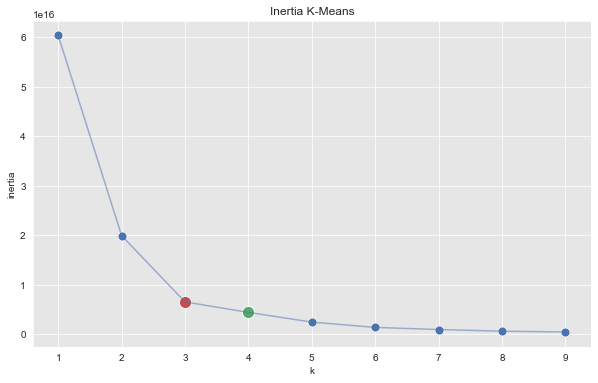

In [284]:
from sklearn.cluster import KMeans

data_df = dataAB.drop('Zone', 1) 
inertias = []

k_candidates = range(1, 10)

for k in k_candidates:
    k_means = KMeans(random_state=42, n_clusters=k)
    k_means.fit(data_df)
    inertias.append(k_means.inertia_)

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=k_candidates, y = inertias, s=80, ax=ax)
sns.scatterplot(x=[k_candidates[2]], y = [inertias[2]], color=sns_c[3], s=150, ax=ax)
sns.scatterplot(x=[k_candidates[3]], y = [inertias[3]], color=sns_c[2], s=150, ax=ax)
sns.lineplot(x=k_candidates, y = inertias, alpha=0.5, ax=ax)
ax.set(title='Inertia K-Means', ylabel='inertia', xlabel='k')
#plt.savefig('_images/Elbow method to determine the number of clusters .jpg',dpi=300)

In [285]:
from sklearn.cluster import KMeans

cluster_number = 3 # select the number of clusters based on the Elbow Method "plot above"

kmeans = KMeans(n_clusters=cluster_number)

X=data_df
kmeans.fit(X)

labels = kmeans.labels_ 

X['label'] = labels

X['cluster'] = 'E'
X.loc[X['label'] == 0, 'cluster'] = 'A'
X.loc[X['label'] == 1, 'cluster'] = 'B'
X.loc[X['label'] == 2, 'cluster'] = 'C'
X.loc[X['label'] == 3, 'cluster'] = 'D'

X['label'].unique()

array([0, 2, 1])

In [286]:
X['cluster'].unique()

array(['A', 'C', 'B'], dtype=object)

customPalette


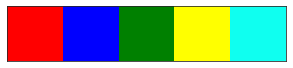

In [287]:
#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette 
print('customPalette')
customPalette = ['#FF0000', '#0000FF', '#008000', '#FFFF00', '#0FFFF0']
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [288]:
X['cluster'] = 'A'
X.loc[X['label'] == 1, 'cluster'] = 'B'
X.loc[X['label'] == 2, 'cluster'] = 'C'
X.loc[X['label'] == 3, 'cluster'] = 'D'
X.loc[X['label'] == 4, 'cluster'] = 'E'
from sklearn.preprocessing import StandardScaler

In [289]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

nonCat_X = X.drop('label', 1)
nonCat_X = nonCat_X.drop('cluster', 1)

X_names = nonCat_X.columns

In [290]:

# Fit your data on the scaler object
scaled_X = scaler.fit_transform(nonCat_X)
scaled_X = pd.DataFrame(scaled_X, columns=X_names)
scaled_X.head(5)

,Session ID,Hour of day,Distance to vehicle,Battery starting %,Battery ending %,Total Converted to Trip,Demand (sessions),Unconverted demand,Trip starts,Trip ends,Active vehicles,Zeroed vehicles,Inactive vehicles,Decayed vehicles
0,-0.061514,-0.183249,-0.838526,-0.704947,-0.564207,0.0,0.773317,0.546247,0.895843,0.822392,0.694103,-0.503481,0.862814,-0.371533
1,0.981441,-0.332273,1.149919,0.257875,-0.342791,0.0,-0.284641,-0.366882,-0.234286,-0.309511,-0.411616,-0.445323,-0.151044,0.495377
2,0.822142,-1.042069,-0.650471,-0.120392,-0.334071,0.0,-0.448373,-0.298397,-0.529959,-0.469139,-0.561908,-0.387165,-0.513137,-0.371533
3,-1.433340,-0.649041,0.191488,1.347127,0.886736,0.0,-0.507148,-0.492437,-0.510248,-0.527185,-0.551172,-0.096376,-0.621764,-0.371533
4,1.240645,-0.845401,0.002640,-0.337095,0.848184,0.0,-0.540734,-0.560922,-0.523389,-0.469139,-0.540437,0.136255,-0.621764,-0.371533


In [291]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = scaled_X
principalComponents = pca.fit_transform(x_pca)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

df_pca = pd.concat([principalDf, X[['cluster']]], axis = 1)
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   principal component 1  35 non-null     float64
 1   principal component 2  35 non-null     float64
 2   cluster                35 non-null     object 
dtypes: float64(2), object(1)
memory usage: 968.0+ bytes


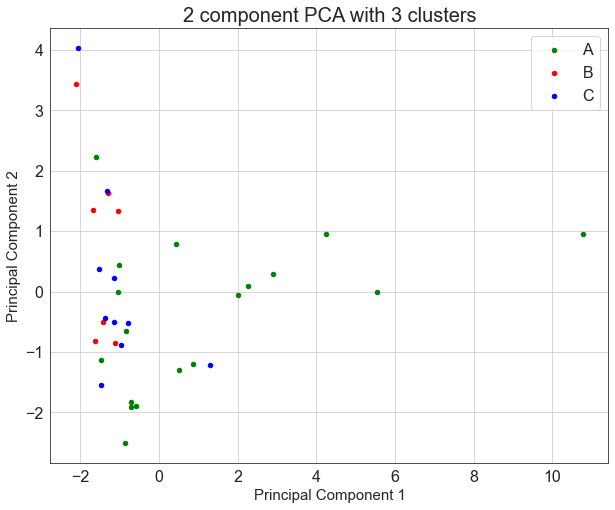

In [292]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1)
#ax.set_ylim(-1,1)
#ax.set_xlim(-0.4,0.2)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA with 3 clusters', fontsize = 20)
targets = ['A', 'B', 'C']
colors = ['#008000','#FF0000','#0000FF']
for target, color in zip(targets,colors):
    indicesToKeep = df_pca['cluster'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'principal component 1']
               , df_pca.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 20)
ax.legend(targets)
ax.grid()
#plt.savefig('_images/2D-PCA_3_clusters.jpg',dpi=300)

In [293]:
df_pca_C = dataAB
df_pca_C['cluster'] = X['cluster']
df_pca_C['principal component 1'] = df_pca['principal component 1']
df_pca_C['principal component 2'] = df_pca['principal component 2']
df_pca_C.head()

,Zone,Session ID,Hour of day,Distance to vehicle,Battery starting %,Battery ending %,Total Converted to Trip,Demand (sessions),Unconverted demand,Trip starts,Trip ends,Active vehicles,Zeroed vehicles,Inactive vehicles,Decayed vehicles,cluster,principal component 1,principal component 2
0,Zone A,5.016273e+08,12.106383,82.987234,52.157447,35.076596,1,361.0,126.0,235.0,212.0,169.0,6.0,41.0,0.0,A,1.997808,-0.056936
1,Zone AA,5.449258e+08,11.904762,177.698413,56.015873,36.285714,1,109.0,46.0,63.0,56.0,66.0,7.0,13.0,1.0,C,-0.778585,-0.519497
2,Zone AB,5.383124e+08,10.944444,91.944444,54.500000,36.333333,1,70.0,52.0,18.0,34.0,52.0,8.0,3.0,0.0,C,-1.131863,0.221290
3,Zone AC,4.446756e+08,11.476190,132.047619,60.380952,43.000000,1,56.0,35.0,21.0,26.0,53.0,13.0,0.0,0.0,B,-1.678494,1.350858
4,Zone AD,5.556867e+08,11.210526,123.052632,53.631579,42.789474,1,48.0,29.0,19.0,34.0,54.0,17.0,0.0,0.0,C,-1.524990,0.368030


In [294]:
df_pca_C['Zone'] = df_pca_C['Zone'].str.replace('Zone', '')

<ipython-input-295-06ceff4c1aae>:16: MatplotlibDeprecationWarning:

The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.



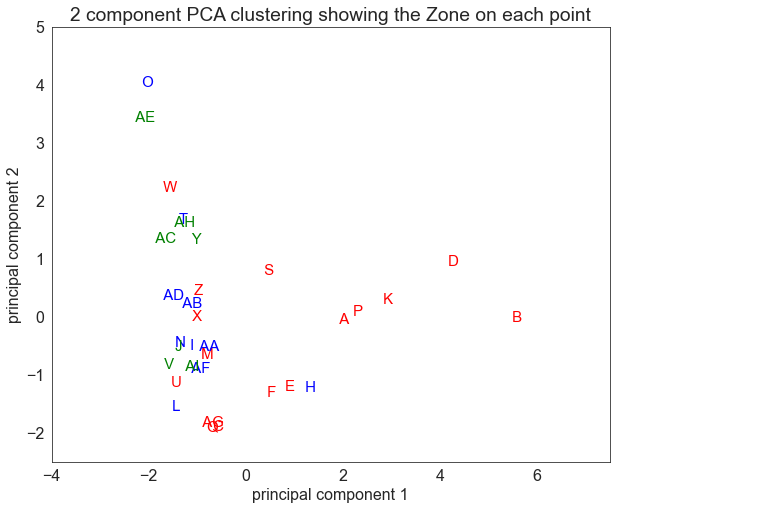

In [295]:
#This cell throws an error. However, the plot is properly generated and saved in the folder where the notebook is located.
#create a new figure and set the x and y limits
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1)
ax.set_ylim(-2.5,5)
ax.set_xlim(-4,7.5)

# list of all cluster labels
clusters = df_pca_C['cluster'].unique()       

for i in range(0,len(clusters)):
    cluster = clusters[i]
    df_pca_cluster = df_pca_C.loc[df_pca_C['cluster']==cluster,:]
    for l, row in df_pca_cluster.iterrows():
        #add the data point as text
        ax.annotate(s=row['Zone'], 
                     xy=(row['principal component 1'],row['principal component 2']),
                     horizontalalignment='center',
                     verticalalignment='center',
                     size=15,
                     color=customPalette[i]) 

    
ax.set_title('2 component PCA clustering showing the Zone on each point')
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
 
plt.savefig('_images/2D-PCA-numbered-clusters_Zone.jpg',dpi=300)
plt.show()